In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [4]:
data = pd.read_csv('/content/Housing.csv')
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [10]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
categorical_cols = data.select_dtypes(include=[object]).columns

data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

data = pd.get_dummies(data, drop_first=True)


In [11]:
X = data.drop(['price'], axis=1)
y = data['price']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
dt_predictions = dt_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

In [16]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Performance:")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_true, y_pred):.2f}")
    print(f"R² Score: {r2_score(y_true, y_pred):.2f}")
    print("-" * 30)

In [17]:
evaluate_model(y_test, dt_predictions, "Decision Tree Regressor")
evaluate_model(y_test, rf_predictions, "Random Forest Regressor")

Decision Tree Regressor Performance:
Mean Absolute Error (MAE): 1195266.06
R² Score: 0.48
------------------------------
Random Forest Regressor Performance:
Mean Absolute Error (MAE): 1021151.08
R² Score: 0.61
------------------------------


In [18]:
import matplotlib.pyplot as plt

def plot_predictions(y_true, y_pred, model_name):
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(y_true)), y_true, color='blue', label='Actual Prices', alpha=0.6)
    plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted Prices', alpha=0.6)
    plt.title(f"{model_name} - Actual vs Predicted Prices")
    plt.xlabel("Sample Index")
    plt.ylabel("House Price")
    plt.legend()
    plt.show()

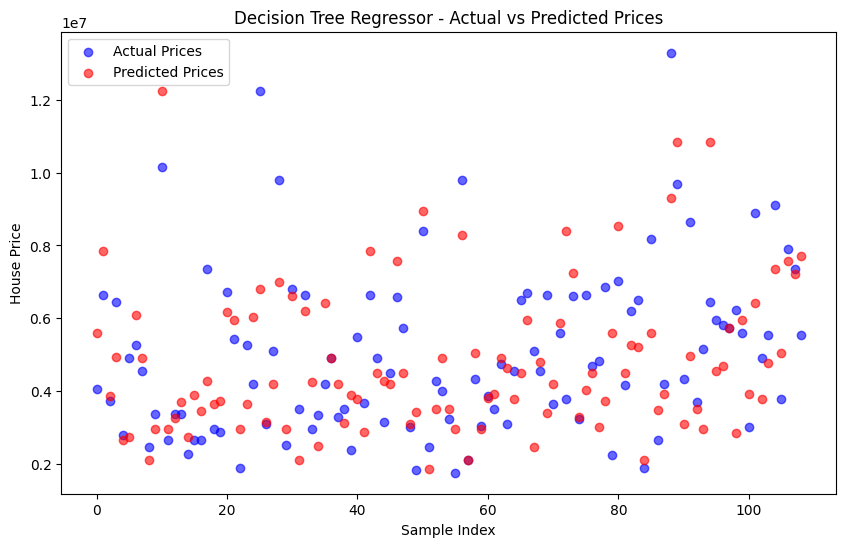

In [19]:
plot_predictions(y_test, dt_predictions, "Decision Tree Regressor")

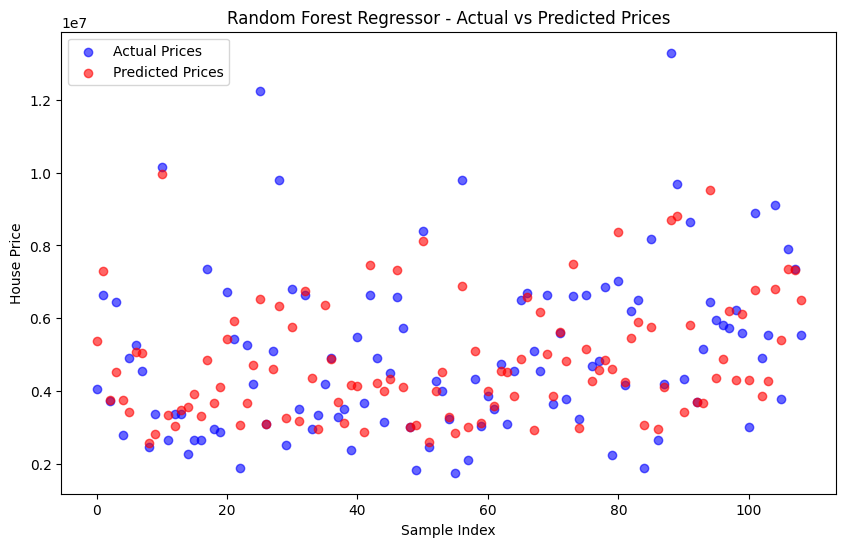

In [20]:
plot_predictions(y_test, rf_predictions, "Random Forest Regressor")

In [21]:
def plot_residuals(y_true, y_pred, model_name):
    residuals = y_true - y_pred
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(residuals)), residuals, color='purple', alpha=0.6)
    plt.hlines(y=0, xmin=0, xmax=len(residuals), colors='black', linestyles='dashed')
    plt.title(f"{model_name} - Residual Plot")
    plt.xlabel("Sample Index")
    plt.ylabel("Residuals (Actual - Predicted)")
    plt.show()

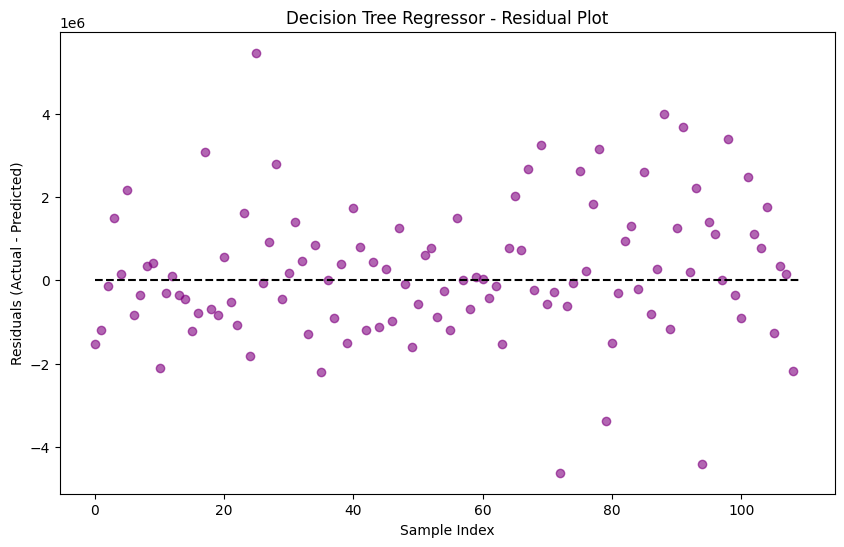

In [22]:
plot_residuals(y_test, dt_predictions, "Decision Tree Regressor")

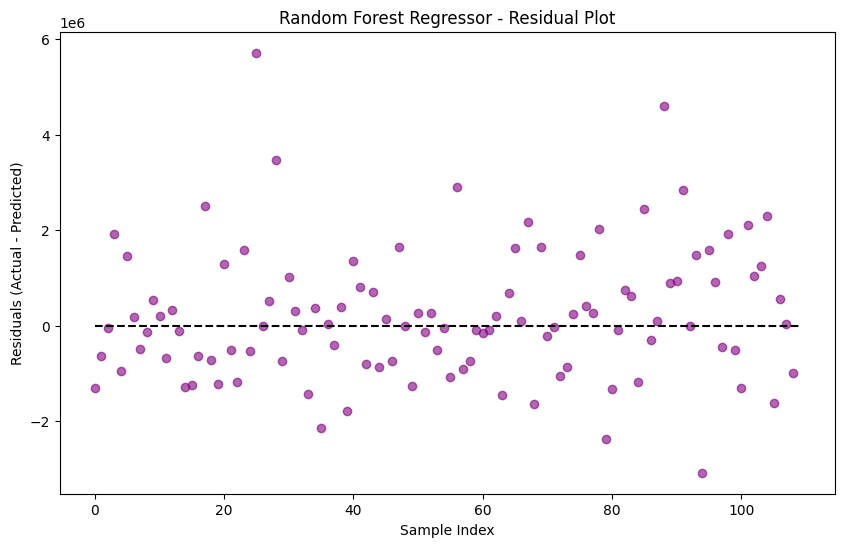

In [23]:
plot_residuals(y_test, rf_predictions, "Random Forest Regressor")